In [71]:
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [44]:
from matplotlib.animation import FuncAnimation
from IPython import display

In [86]:
class PathFinding:
    
    def __init__(self,size,start,finish):
        
        self.start = start
        self.finish = finish
        self.size = size
        
        self.env = np.zeros((size,size))
        
        adj_list = dict()
        
        for i in range(self.size):
            for j in range(self.size):
                
                neighbours = [(i,j-1),(i+1,j),(i-1,j),(i,j+1)]
                temp = neighbours.copy()
                for unit in temp:
                    if(unit[0] < 0 or unit[1] < 0):
                        neighbours.remove(unit)
                    if unit[0] > size - 1 or unit[1] > size - 1:
                        neighbours.remove(unit)
                adj_list[(i,j)] = neighbours        
#         print(adj_list)        
        self.adj_dict = adj_list
                
        
        
    def bfs(self):
        
        queue = []
        visited = np.zeros((self.size,self.size))
        queue.append(self.start)
        
        
        while len(queue) > 0:
            
            ver = queue.pop(0)
            
            
            adjlist = self.adj_dict[ver]
            
            for vertex in adjlist:
                
                if visited[vertex] == 0:
                    
                    visited[vertex] = 1
                    self.env[vertex] = self.env[ver] + 1
                    queue.append(vertex)
            sns.heatmap(visited)
#             plt.show()

           
        
        

In [87]:
travel = PathFinding(10,(0,0),(9,9))

TypeError: 'NoneType' object is not callable

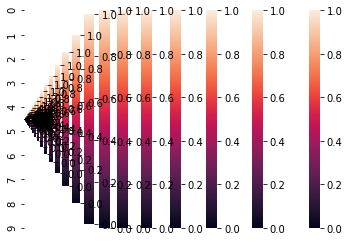

In [88]:
fig = plt.figure()

lines = plt.plot([])
line = lines[0]

anim = FuncAnimation(fig,travel.bfs(),frames=200,interval=20)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()